In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

def plot_user_recommendations(user_id):
    conn = psycopg2.connect(
        host="localhost",
        dbname="moviedb",
        user="ajinkyaambadkar",
        password="Achiever216"
    )

    query = """
        SELECT r.movie_id, m.title, r.score
        FROM recommendations r
        JOIN movies m ON r.movie_id = m.movie_id
        WHERE r.user_id = %s
        ORDER BY r.score DESC
        LIMIT 10;
    """

    df = pd.read_sql(query, conn, params=(user_id,))
    conn.close()

    plt.figure(figsize=(10, 6))
    plt.barh(df['title'], df['score'], color='skyblue')
    plt.gca().invert_yaxis()
    plt.xlabel("Hybrid Score")
    plt.title(f"Top 10 Recommendations for User {user_id}")
    plt.tight_layout()
    plt.show()


/var/folders/z9/k5mpzs5n7yvdr65g96bpt72m0000gn/T/ipykernel_73604/3767400990.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn, params=(user_id,))


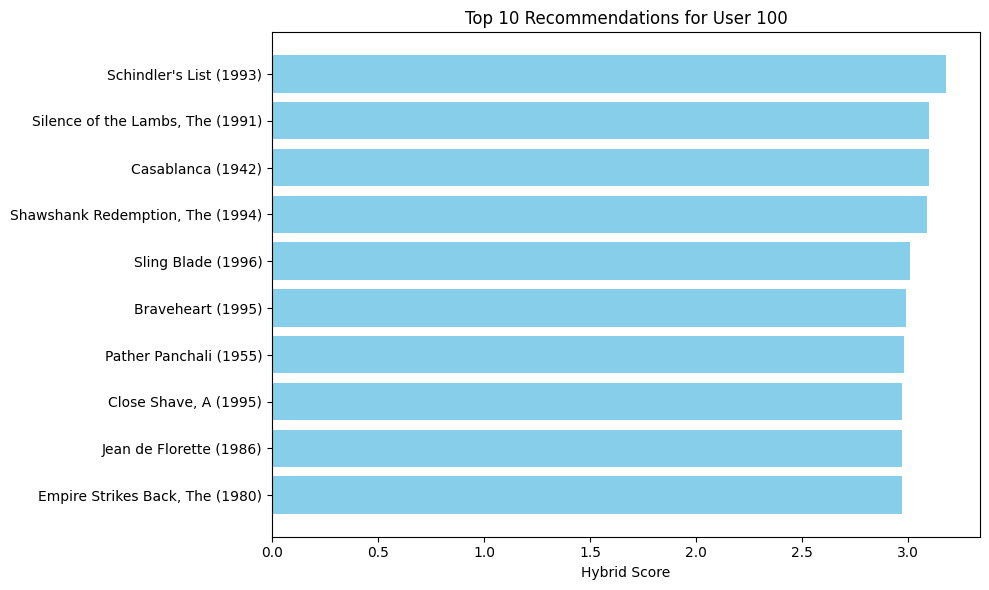

In [7]:
plot_user_recommendations(100)